Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
df.drop(['Unnamed: 0', 'index'], axis = 1, inplace = True)
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

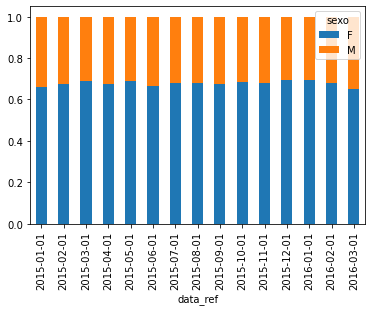

In [35]:
tab_freq = pd.crosstab(df['data_ref'],df['sexo'])
tab = tab_freq.div(tab_freq.sum(axis = 1), axis = 0)
ax = tab.plot.bar(stacked = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2015-01-01'),
  Text(1, 0, '2015-02-01'),
  Text(2, 0, '2015-03-01'),
  Text(3, 0, '2015-04-01'),
  Text(4, 0, '2015-05-01'),
  Text(5, 0, '2015-06-01'),
  Text(6, 0, '2015-07-01'),
  Text(7, 0, '2015-08-01'),
  Text(8, 0, '2015-09-01'),
  Text(9, 0, '2015-10-01'),
  Text(10, 0, '2015-11-01'),
  Text(11, 0, '2015-12-01'),
  Text(12, 0, '2016-01-01'),
  Text(13, 0, '2016-02-01'),
  Text(14, 0, '2016-03-01')])

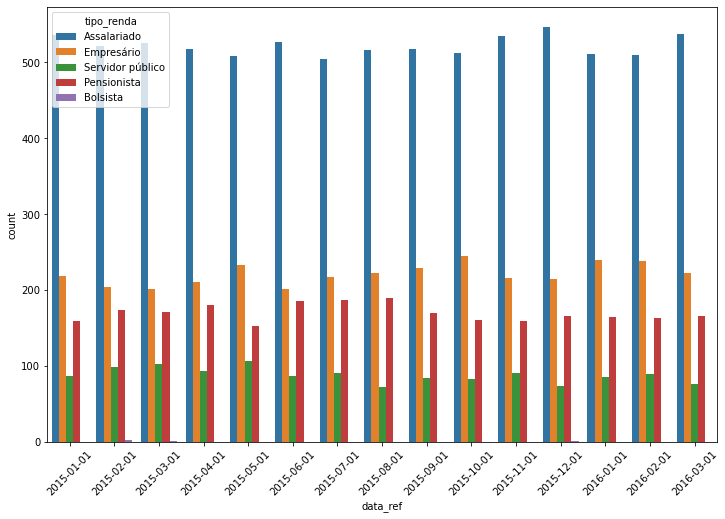

In [23]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x='data_ref',  hue = 'tipo_renda', data=df)
plt.xticks(rotation=45)

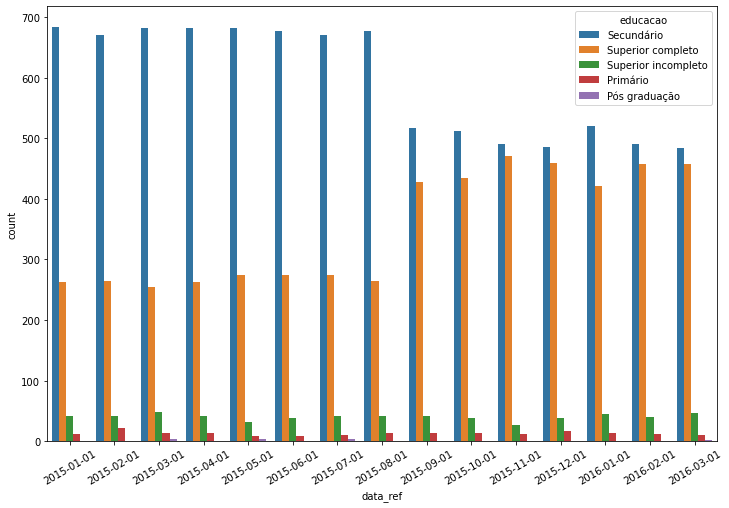

In [24]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x='data_ref',  hue = 'educacao', data=df).set_xticklabels(ax.get_xticklabels(), rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2015-01-01'),
  Text(1, 0, '2015-02-01'),
  Text(2, 0, '2015-03-01'),
  Text(3, 0, '2015-04-01'),
  Text(4, 0, '2015-05-01'),
  Text(5, 0, '2015-06-01'),
  Text(6, 0, '2015-07-01'),
  Text(7, 0, '2015-08-01'),
  Text(8, 0, '2015-09-01'),
  Text(9, 0, '2015-10-01'),
  Text(10, 0, '2015-11-01'),
  Text(11, 0, '2015-12-01'),
  Text(12, 0, '2016-01-01'),
  Text(13, 0, '2016-02-01'),
  Text(14, 0, '2016-03-01')])

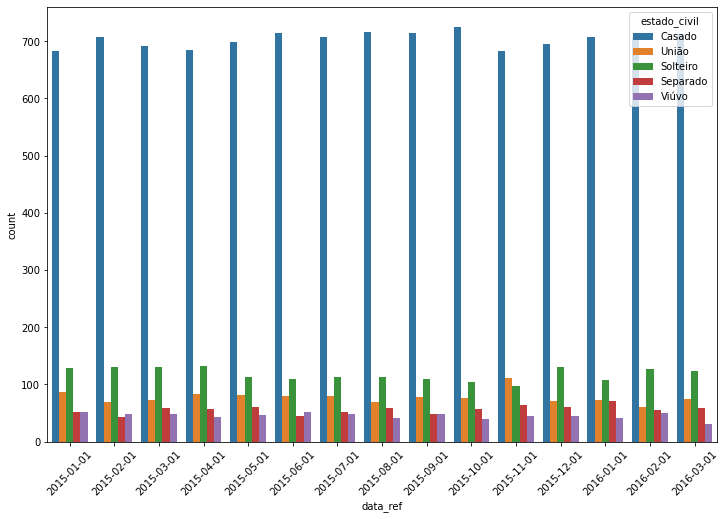

In [26]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x='data_ref',  hue = 'estado_civil', data=df)
plt.xticks(rotation=45)

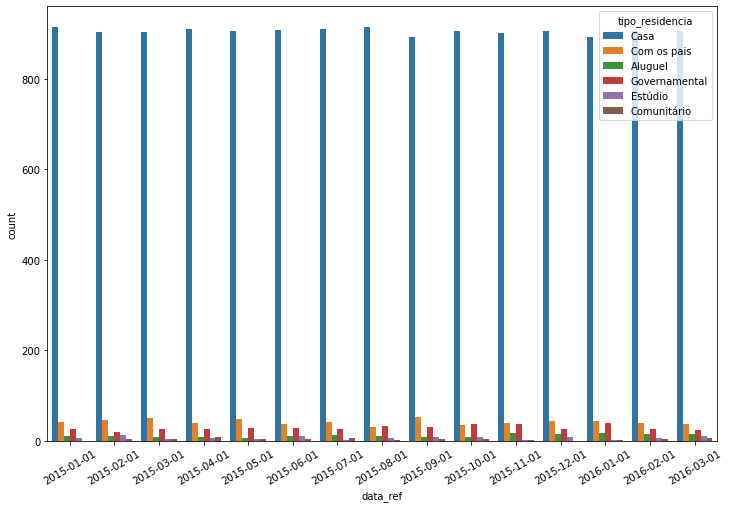

In [27]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x='data_ref',  hue = 'tipo_residencia', data=df).set_xticklabels(ax.get_xticklabels(), rotation=30)

A única preocupação seria coma  diferença na variável educaçãode agosto para setembro tem uma variação que gera atenção de secundário para superior completo

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [28]:
df.groupby('data_ref').mean()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
data_ref,,,,,,,,
2015-01-01,0.389,0.667,0.431,43.794,7.677761,2.201,0.021,4606.01071
2015-02-01,0.400,0.683,0.438,44.109,7.688772,2.217,0.017,4672.76708
2015-03-01,0.399,0.673,0.408,43.657,7.826948,2.173,0.025,4616.11109
2015-04-01,0.348,0.673,0.428,43.534,7.750912,2.198,0.026,4578.24089
2015-05-01,0.383,0.651,0.394,43.935,8.087878,2.174,0.021,4631.34791
2015-06-01,0.398,0.661,0.435,44.296,7.745659,2.227,0.021,4655.06673
2015-07-01,0.381,0.666,0.396,44.090,8.075634,2.184,0.024,4649.65631
2015-08-01,0.396,0.700,0.451,43.863,7.279533,2.238,0.020,4375.43335
2015-09-01,0.399,0.651,0.440,43.631,7.979513,2.232,0.023,4544.69542


In [ ]:
tipo_residencia, estado_civil, educacao, tipo_renda, sexo

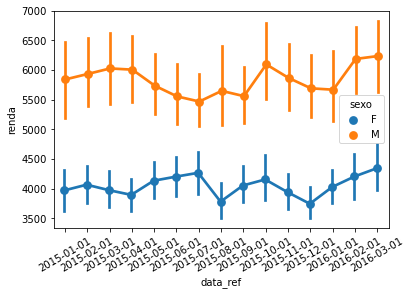

In [38]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'sexo',
                   data=df, dodge=True, ci = 95).set_xticklabels(ax.get_xticklabels(), rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2015-01-01'),
  Text(1, 0, '2015-02-01'),
  Text(2, 0, '2015-03-01'),
  Text(3, 0, '2015-04-01'),
  Text(4, 0, '2015-05-01'),
  Text(5, 0, '2015-06-01'),
  Text(6, 0, '2015-07-01'),
  Text(7, 0, '2015-08-01'),
  Text(8, 0, '2015-09-01'),
  Text(9, 0, '2015-10-01'),
  Text(10, 0, '2015-11-01'),
  Text(11, 0, '2015-12-01'),
  Text(12, 0, '2016-01-01'),
  Text(13, 0, '2016-02-01'),
  Text(14, 0, '2016-03-01')])

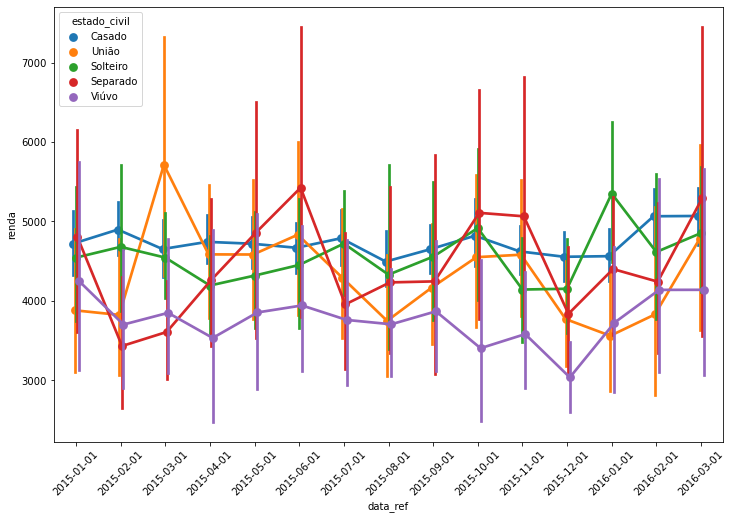

In [41]:
plt.figure(figsize = (12,8))
ax = sns.pointplot(x="data_ref", y="renda", hue = 'estado_civil',
                   data=df, dodge=True, ci = 95)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2015-01-01'),
  Text(1, 0, '2015-02-01'),
  Text(2, 0, '2015-03-01'),
  Text(3, 0, '2015-04-01'),
  Text(4, 0, '2015-05-01'),
  Text(5, 0, '2015-06-01'),
  Text(6, 0, '2015-07-01'),
  Text(7, 0, '2015-08-01'),
  Text(8, 0, '2015-09-01'),
  Text(9, 0, '2015-10-01'),
  Text(10, 0, '2015-11-01'),
  Text(11, 0, '2015-12-01'),
  Text(12, 0, '2016-01-01'),
  Text(13, 0, '2016-02-01'),
  Text(14, 0, '2016-03-01')])

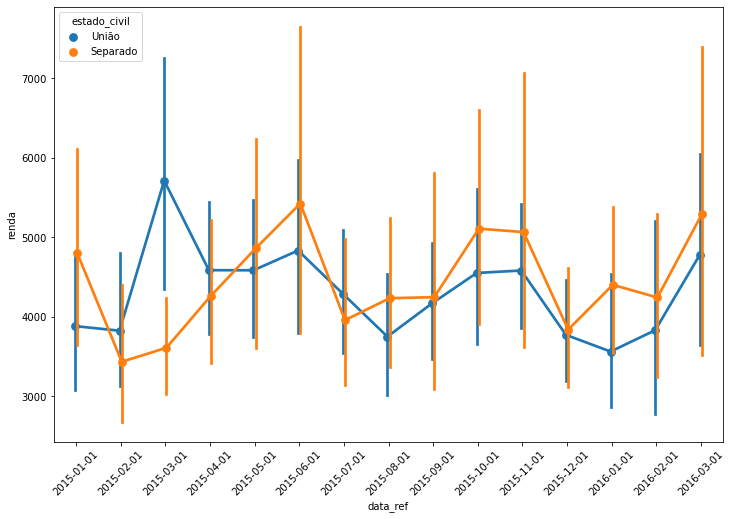

In [48]:
plt.figure(figsize = (12,8))
df_sepuni = df.query( 'estado_civil == "Separado" or estado_civil == "União"')
ax = sns.pointplot(x="data_ref", y="renda", hue = 'estado_civil',
                   data=df_sepuni, dodge=True, ci = 95)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2015-01-01'),
  Text(1, 0, '2015-02-01'),
  Text(2, 0, '2015-03-01'),
  Text(3, 0, '2015-04-01'),
  Text(4, 0, '2015-05-01'),
  Text(5, 0, '2015-06-01'),
  Text(6, 0, '2015-07-01'),
  Text(7, 0, '2015-08-01'),
  Text(8, 0, '2015-09-01'),
  Text(9, 0, '2015-10-01'),
  Text(10, 0, '2015-11-01'),
  Text(11, 0, '2015-12-01'),
  Text(12, 0, '2016-01-01'),
  Text(13, 0, '2016-02-01'),
  Text(14, 0, '2016-03-01')])

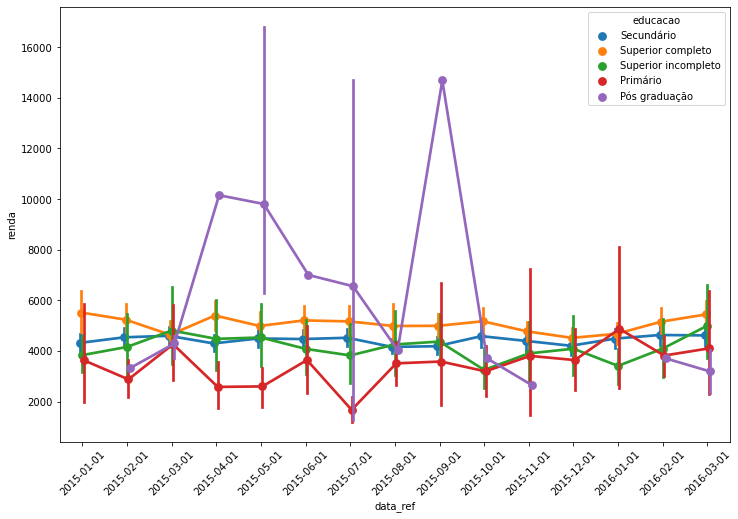

In [50]:
plt.figure(figsize = (12,8))
ax = sns.pointplot(x="data_ref", y="renda", hue = 'educacao',
                   data=df, dodge=True, ci = 95)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2015-01-01'),
  Text(1, 0, '2015-02-01'),
  Text(2, 0, '2015-03-01'),
  Text(3, 0, '2015-04-01'),
  Text(4, 0, '2015-05-01'),
  Text(5, 0, '2015-06-01'),
  Text(6, 0, '2015-07-01'),
  Text(7, 0, '2015-08-01'),
  Text(8, 0, '2015-09-01'),
  Text(9, 0, '2015-10-01'),
  Text(10, 0, '2015-11-01'),
  Text(11, 0, '2015-12-01'),
  Text(12, 0, '2016-01-01'),
  Text(13, 0, '2016-02-01'),
  Text(14, 0, '2016-03-01')])

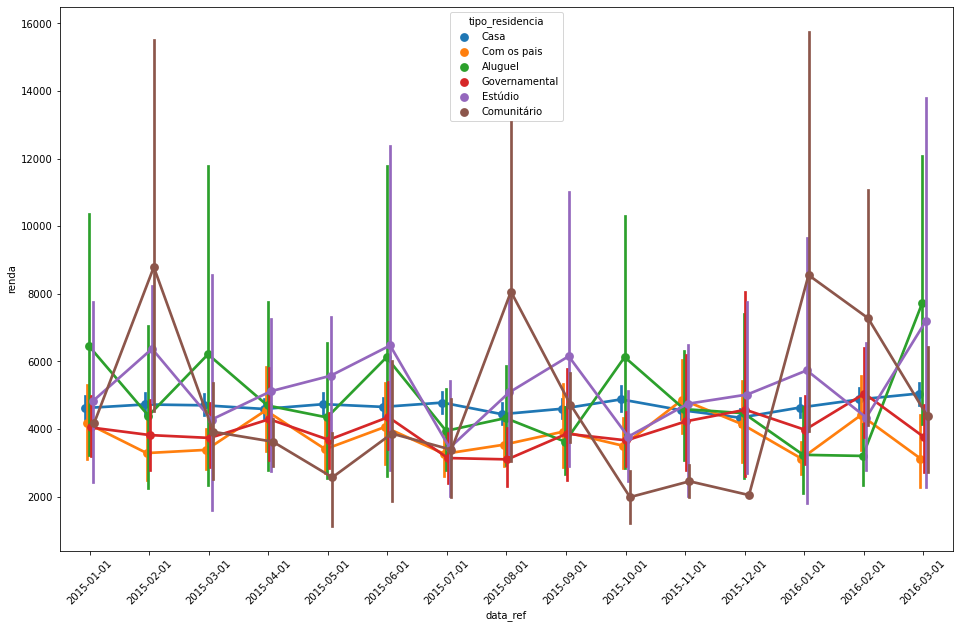

In [52]:
plt.figure(figsize = (16,10))
ax = sns.pointplot(x="data_ref", y="renda", hue = 'tipo_residencia',
                   data=df, dodge=True, ci = 95)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2015-01-01'),
  Text(1, 0, '2015-02-01'),
  Text(2, 0, '2015-03-01'),
  Text(3, 0, '2015-04-01'),
  Text(4, 0, '2015-05-01'),
  Text(5, 0, '2015-06-01'),
  Text(6, 0, '2015-07-01'),
  Text(7, 0, '2015-08-01'),
  Text(8, 0, '2015-09-01'),
  Text(9, 0, '2015-10-01'),
  Text(10, 0, '2015-11-01'),
  Text(11, 0, '2015-12-01'),
  Text(12, 0, '2016-01-01'),
  Text(13, 0, '2016-02-01'),
  Text(14, 0, '2016-03-01')])

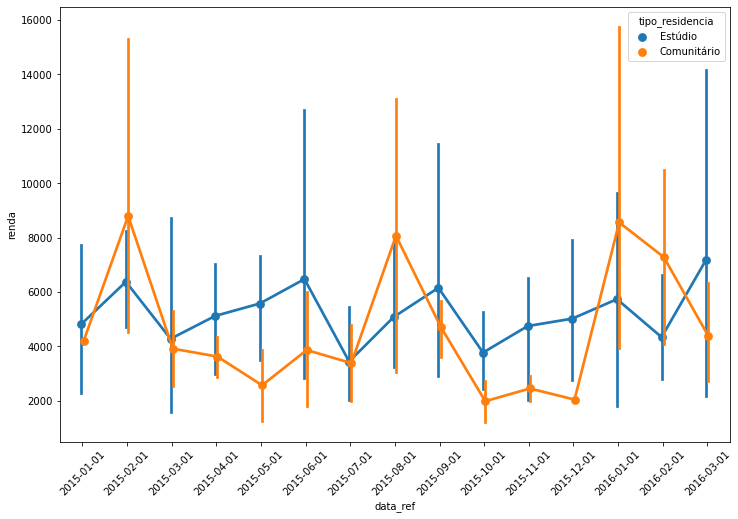

In [58]:
plt.figure(figsize = (12,8))
df_cumnitudio = df.query( 'tipo_residencia == "Comunitário" or tipo_residencia == "Estúdio"')
ax = sns.pointplot(x="data_ref", y="renda", hue = 'tipo_residencia',
                   data=df_cumnitudio, dodge=True, ci = 95)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2015-01-01'),
  Text(1, 0, '2015-02-01'),
  Text(2, 0, '2015-03-01'),
  Text(3, 0, '2015-04-01'),
  Text(4, 0, '2015-05-01'),
  Text(5, 0, '2015-06-01'),
  Text(6, 0, '2015-07-01'),
  Text(7, 0, '2015-08-01'),
  Text(8, 0, '2015-09-01'),
  Text(9, 0, '2015-10-01'),
  Text(10, 0, '2015-11-01'),
  Text(11, 0, '2015-12-01'),
  Text(12, 0, '2016-01-01'),
  Text(13, 0, '2016-02-01'),
  Text(14, 0, '2016-03-01')])

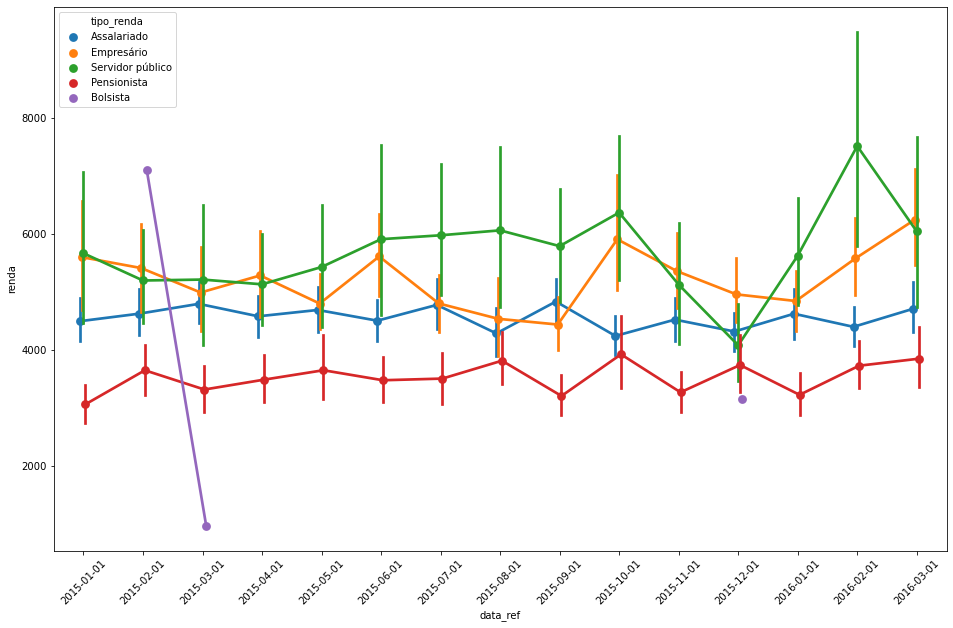

In [59]:
plt.figure(figsize = (16,10))
ax = sns.pointplot(x="data_ref", y="renda", hue = 'tipo_renda',
                   data=df, dodge=True, ci = 95)
plt.xticks(rotation=45)

Temos variações importantes nas variáveis tipo_renda (bolsista e servidor público), tipo_residencia (estúdio e comunitário), educação (pós-graduação) e na estado_civil (sparado e união). Essas variações devem ser levadas em consideração, pois nível de escolaridade e estado civil podem impactar diretamente na inadimplência, por exemplo.